In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def update_strings_loops(strings, loops):
    # Simulates tying ends of strings in a bowl to potentially form loops
    # Each execution ties any two ends together, which results in either forming a longer string or creating a loop

    # Index the ends of the strings
    ends = np.arange(2 * len(strings))

    # Randomly pick two ends
    end1, end2 = np.random.choice(len(ends), size=2, replace=False)

    '''
    Note:
    Assume w.l.o.g. that the ends of the k-th string are indexed 2k-2 and 2k-1;
    conversely, the end indexed r belongs to the string at index floor(r/2).
    '''

    # Find the indexes of the strings that the ends belong to
    index1 = int(np.floor(end1 / 2))
    index2 = int(np.floor(end2 / 2))

    if index1 == index2:
        # If the indexes are the same, add the loop formed by that string to the loops list
        loops.append(strings[index1])
        strings = np.delete(strings, index1)
    else:
        # If the indexes are not the same, add the sum to the strings array
        strings = np.append(strings, strings[index1] + strings[index2])

        # Delete the original strings that were joined, avoiding index shifting by removing the higher index first
        strings = np.delete(strings, max(index1, index2))
        strings = np.delete(strings, min(index1, index2))
        
    return strings, loops

In [3]:
def simulation(S0=3, n=3):
    # This function simulates the process of updating strings and forming loops over 'n' iterations, starting with 'S0' strings
    
    if n > S0:
        print('Number of iterations cannot exceed the initial number of strings.')
        return None

    # Initialize a list 'strings' with 'S0' elements, all set to 1, this represents our starting set of strings
    strings = [1] * S0

    # Initialize an empty list 'loops' to store loop values
    loops = []

    # Repeat the process 'n' times, simulating the update of strings and loops
    for _ in range(n):
        # In each iteration, update the 'strings' and 'loops'
        strings, loops = update_strings_loops(strings, loops)

    return strings, loops

In [4]:
def simulation_average(S0, n_values, num_trials=50000):
    # Runs the simulation for different numbers of iterations of typing ends (n) and calculates the average number of loops formed for each n
    
    np.random.seed(seed=0) # For reproducibility
    
    # Initialize dictionary to store average loops for each n
    averages = {}

    # Iterate over each number of iterations (n)
    for n in n_values:
        loops_counts = []   # List to hold the number of loops for each trial

        # Run simulation num_trials times for each n
        for _ in range(num_trials):
            _, loops = simulation(S0, n)    # Run simulation
            loops_counts.append(len(loops)) # Append number of loops

        # Calculate and store the average number of loops for this n
        averages[n] = np.mean(loops_counts)
    
    # Return dictionary of average loops for each n
    return averages

In [5]:
# Define the initial number of strings and the number of iterations to simulate
S0 = 3
n_values = [1, 2, 3]

# Run the simulations and calculate averages
average_loops = simulation_average(S0, n_values)

# Display the average number of loops formed for each n
for n, avg in average_loops.items():
    print(f"Average number of loops for (n,S0)=({n}): {avg}")

Average number of loops for (n,S0)=(1): 0.19902
Average number of loops for (n,S0)=(2): 0.53172
Average number of loops for (n,S0)=(3): 1.53342


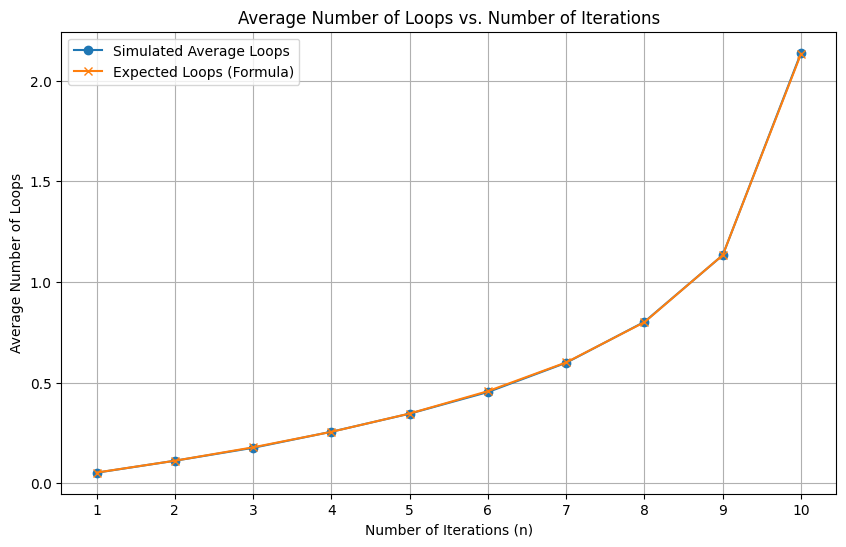

In [6]:
# Define the initial number of strings and the number of iterations to simulate
S0 = 10
n_values = range(1, 11)

# Run the simulations for S0=10 and n=1,...,10
average_loops_new = simulation_average(S0, n_values)

# Calculate the expected number of loops using the formula
expected_loops = {n: sum([1 / (2 * (S0 - i) + 1) for i in range(1, n + 1)]) for n in n_values}

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(list(average_loops_new.keys()), list(average_loops_new.values()), label='Simulated Average Loops', marker='o')
plt.plot(list(expected_loops.keys()), list(expected_loops.values()), label='Expected Loops (Formula)', marker='x')

plt.xticks(n_values)
plt.xlabel('Number of Iterations (n)')
plt.ylabel('Average Number of Loops')
plt.title('Average Number of Loops vs. Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def simulation_distribution(S0, num_trials=100000):
    # Runs the simulaiton for the probability distribution of the patterns  

    np.random.seed(0)   # For reproducibility
    loop_patterns = Counter()   # Track occurrences of loop patterns

    for _ in range(num_trials):
        strings = [1] * S0  # Initialize strings, each of length 1
        loops = []  # Initialize empty list for loops

        # Continue tying until all strings have been tied into loops
        while len(strings) > 0:
            strings, loops = update_strings_loops(strings, loops)

        # Convert the list of loops into an S0-dimensional vector representation
        loop_vector = [0] * S0
        for loop in loops:
            loop_vector[loop-1] += 1  # Increment the count for the corresponding loop size
        
        loop_pattern = tuple(loop_vector)  # Convert list to tuple for use as a dictionary key
        loop_patterns[loop_pattern] += 1

    # Calculate the probability of each loop configuration
    total_patterns = sum(loop_patterns.values())
    loop_pattern_probabilities = {pattern: count / total_patterns for pattern, count in loop_patterns.items()}

    return loop_pattern_probabilities

In [8]:
# Define the initial number of strings and the number of trials
S0 = 6
num_trials = 100000
loop_pattern_probabilities = simulation_distribution(S0, num_trials)

# Display the probability of each loop pattern, sorted by likelihood
for pattern, prob in sorted(loop_pattern_probabilities.items(), key=lambda x: x[1], reverse=True):
    print(f"Pattern: {pattern}, Probability: {prob:.4f}")

Pattern: (0, 0, 0, 0, 0, 1), Probability: 0.3699
Pattern: (1, 0, 0, 0, 1, 0), Probability: 0.2209
Pattern: (0, 1, 0, 1, 0, 0), Probability: 0.1389
Pattern: (1, 1, 1, 0, 0, 0), Probability: 0.0926
Pattern: (2, 0, 0, 1, 0, 0), Probability: 0.0700
Pattern: (0, 0, 2, 0, 0, 0), Probability: 0.0605
Pattern: (2, 2, 0, 0, 0, 0), Probability: 0.0176
Pattern: (3, 0, 1, 0, 0, 0), Probability: 0.0150
Pattern: (0, 3, 0, 0, 0, 0), Probability: 0.0115
Pattern: (4, 1, 0, 0, 0, 0), Probability: 0.0029
Pattern: (6, 0, 0, 0, 0, 0), Probability: 0.0001
